# XGBoost model

## Notebook Summary

This notebook demonstrates a complete workflow for text classification using machine learning. The process includes:

- **Data Loading & Exploration:** The training data is loaded, inspected, and the class distribution is visualized.
- **Text Preprocessing:** Text data is cleaned using NLTK for stopword removal and lemmatization.
- **Train-Test Split:** The dataset is split into training and testing sets.
- **Model Building:** An XGBoost classifier is trained using a pipeline with TF-IDF vectorization.
- **Evaluation:** Model performance is evaluated with accuracy, classification report, and confusion matrix visualizations.
- **Model Persistence:** The trained pipeline is saved and reloaded for future use.
- **Prediction on New Data:** Unlabeled test data is loaded, preprocessed, and predictions are generated.
- **Results Saving & Visualization:** Predictions are saved to a CSV file and the distribution of predicted labels is visualized.

The notebook leverages libraries such as pandas, scikit-learn, XGBoost, NLTK, seaborn, and matplotlib for data handling, modeling, and visualization.

### Global imports

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
import joblib 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

## NLTK Resource Download

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliensebag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juliensebag/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Data

In [3]:
data = pd.read_csv("./dataset/training_data_lowercase.csv", sep="\t", header=None, names=["label", "title"])
data.reset_index(drop=True, inplace=True)  

data.head()
data.columns = ['label','title']
data.head()

,label,title
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34152 entries, 0 to 34151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   34152 non-null  int64 
 1   title   34152 non-null  object
dtypes: int64(1), object(1)
memory usage: 533.8+ KB


# Plotting Class Distribution

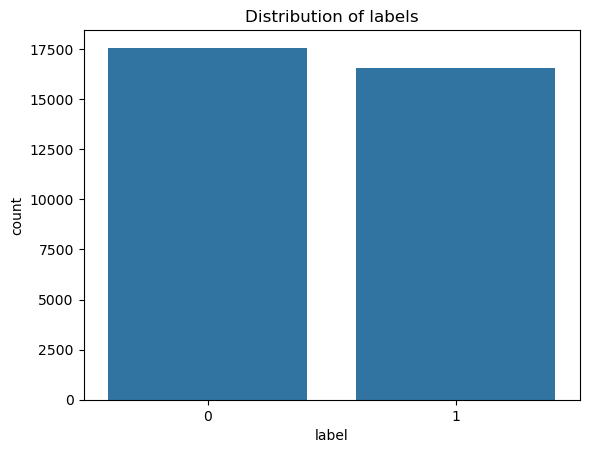

In [5]:
sb.countplot(x='label', data=data)
plt.title("Distribution of labels")
plt.show()

In [6]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special chars and digits
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

data['clean_title'] = data['title'].apply(preprocess_text)


# Train_Test_Split

In [7]:
X = data['title'] 
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Pipeline (XGBClassifier)

In [8]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=10000)),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

pipeline.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:57:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

# Model Prediction and Evaluation

In [9]:
y_pred = pipeline.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9093836919923877


# Detailed Classification Report and Visualization

In [11]:
print("\nClassification Report:")  
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3529
           1       0.87      0.95      0.91      3302

    accuracy                           0.91      6831
   macro avg       0.91      0.91      0.91      6831
weighted avg       0.91      0.91      0.91      6831



# Confusion Matrix

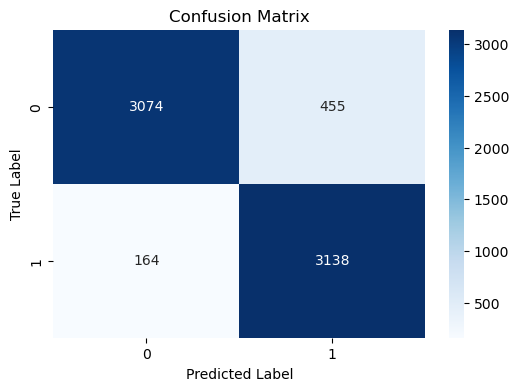

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt  

cm = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(6, 4)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
plt.title('Confusion Matrix')  
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')  
plt.show() 

# Save Trained Pipeline

In [13]:
joblib.dump(pipeline, 'XGBoost.pkl')

['XGBoost.pkl']

# Load Trained Pipeline

In [14]:
# Load saved pipeline
pipeline = joblib.load('XGBoost.pkl')

# Load Test Data and Preprocess

In [15]:
# Load new test data
test_data = pd.read_csv('./dataset/testing_data_lowercase_nolabels.csv', header=None, names=['combined'])

# Extract Features for Prediction


In [16]:
test_data[['label', 'title']] = test_data['combined'].str.split('\t', n=1, expand=True)
test_data = test_data.drop(columns=['label', 'combined'])

In [17]:
print("Sample of test data (no labels):")
print(test_data.head())

Sample of test data (no labels):
                                               title
0  copycat muslim terrorist arrested with assault...
1  wow! chicago protester caught on camera admits...
2   germany's fdp look to fill schaeuble's big shoes
3  mi school sends welcome back packet warning ki...
4  u.n. seeks 'massive' aid boost amid rohingya '...


# Load Pipeline and Predict

In [18]:
loaded_pipeline = joblib.load('LogisticRegression.pkl')
test_data['predicted_label'] = loaded_pipeline.predict(test_data['title'])
new_predictions = pipeline.predict(test_data['title'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.5.1. This might lead t

In [19]:
test_data['predicted_label'] = new_predictions
new_predictions = pipeline.predict(test_data['title'])
print("\nSample Predictions:")
print(test_data.head())


Sample Predictions:
                                               title  predicted_label
0  copycat muslim terrorist arrested with assault...                0
1  wow! chicago protester caught on camera admits...                0
2   germany's fdp look to fill schaeuble's big shoes                1
3  mi school sends welcome back packet warning ki...                0
4  u.n. seeks 'massive' aid boost amid rohingya '...                1




# Save Predictions to CSV

In [20]:
output_path = 'predictions_on_unlabeled_test_data.csv'
test_data.to_csv(output_path, index=False)
print(f"\nPredictions saved to: {output_path}")


Predictions saved to: predictions_on_unlabeled_test_data.csv


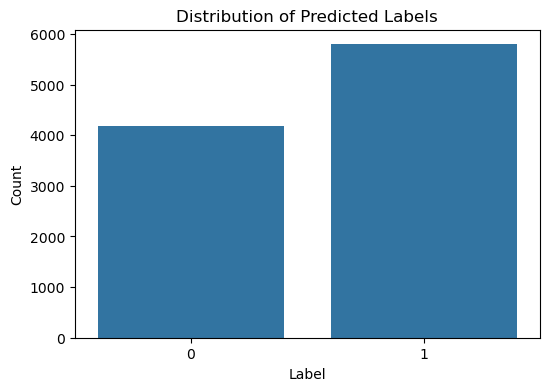

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of predicted labels
plt.figure(figsize=(6,4))
sns.countplot(x='predicted_label', data=test_data)
plt.title("Distribution of Predicted Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

## Conclusion

In this notebook, we developed a robust text classification pipeline leveraging modern machine learning techniques. The workflow included comprehensive data preprocessing, effective feature extraction using TF-IDF, and model training with XGBoost, which demonstrated strong predictive performance. Evaluation metrics such as accuracy, classification report, and confusion matrix confirmed the model's effectiveness on unseen data. The trained pipeline was successfully saved, reloaded, and applied to new, unlabeled test data, with predictions visualized and exported for further analysis. This end-to-end approach ensures reproducibility and scalability for future text classification tasks.